<a href="https://colab.research.google.com/github/CREVIOS/mnist/blob/main/Mnist_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Md.Sadek Hossain Asif

In [42]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
import numpy as np
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]
print("Labels:", len(x_train))


Labels: 60000


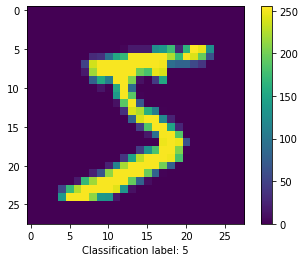

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(y_train[0]))
plt.show()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# **Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# **Model Summary**

In [ ]:
model.summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

# **Model Training**

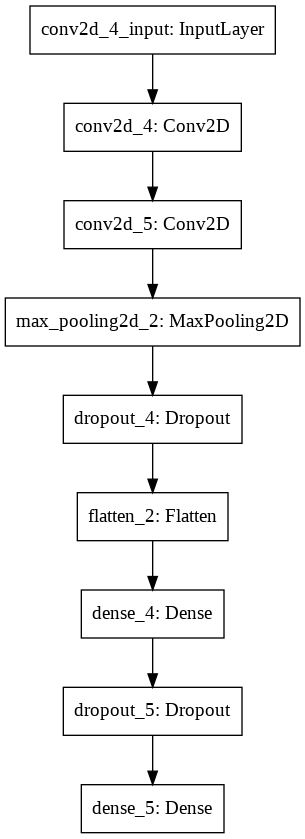

In [53]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 152s 325ms/step - loss: 2.2801 - accuracy: 0.1345 - val_loss: 2.2407 - val_accuracy: 0.2915
Epoch 2/12
469/469 [==============================] - 145s 308ms/step - loss: 2.2177 - accuracy: 0.2524 - val_loss: 2.1663 - val_accuracy: 0.4581
Epoch 3/12
469/469 [==============================] - 147s 313ms/step - loss: 2.1413 - accuracy: 0.3602 - val_loss: 2.0682 - val_accuracy: 0.5789
Epoch 4/12
469/469 [==============================] - 145s 309ms/step - loss: 2.0387 - accuracy: 0.4455 - val_loss: 1.9372 - val_accuracy: 0.6667
Epoch 5/12
469/469 [==============================] - 146s 310ms/step - loss: 1.9034 - accuracy: 0.5158 - val_loss: 1.7686 - val_accuracy: 0.7169
Epoch 6/12
469/469 [==============================] - 145s 310ms/step - loss: 1.7422 - accuracy: 0.5633 - val_loss: 1.5700 - val_accuracy: 0.7507
Epoch 7/12
469/469 [==============================] - 148s 315ms/step - loss: 1.5699 - accuracy: 0.5989 - val_loss: 1.3638 -

# **Evaluation**

In [ ]:
example_img = x_test[0]

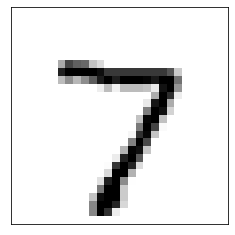

In [47]:

newimage = np.reshape(example_img,(28,28))
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(newimage, cmap=plt.cm.binary)

In [ ]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print("Predicted value:", np.argmax(img_prediction))



Image data shape: (1, 28, 28, 1)
Prediction results: [[0.01023546 0.00966323 0.00466284 0.03495229 0.01175072 0.01807204
  0.00241171 0.8286667  0.01298105 0.06660396]]
Predicted value: 7
